# Bibliotecas

In [16]:
#Incluir clusters
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.cluster import KMeans
from dataclasses import dataclass, field
from optimize_team_location import *

# Verificando dados

In [17]:
def plot_location(location_map, label, alpha=1, title=None, xlabel='Latitude', ylabel='Longitude', legend_loc='best', color='blue'):
    """
    Plota os pontos representados em 'location_map' no gráfico, com vários parâmetros personalizáveis.

    Parameters:
    - location_map: Dicionário de localização.
    - label: Texto para o label da legenda.
    - alpha: Nível de transparência para os pontos (0 a 1).
    - title: Título do gráfico (opcional).
    - xlabel: Rótulo para o eixo x (opcional).
    - ylabel: Rótulo para o eixo y (opcional).
    - legend_loc: Localização da legenda (opcional).
    """

    # Extraindo as coordenadas lat e long
    lat = [location[0] for location in location_map.values()]
    long = [location[1] for location in location_map.values()]

    # Plotando os pontos
    plt.scatter(lat, long, label=label, alpha=alpha, color=color)

    # Configurando o título e rótulos dos eixos
    if title:
        plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Configurando a legenda
    plt.legend(loc=legend_loc)

In [8]:
# Apresentando dados
data = pd.read_csv("probdata.csv", delimiter=";", header=None, decimal=',', names=[
        "Latitude_Base", "Longitude_Base", "Latitude_Ativo", "Longitude_Ativo", "Distância"
    ])
data.head()

,Latitude_Base,Longitude_Base,Latitude_Ativo,Longitude_Ativo,Distância
0,-20.423569,-43.856621,-19.985392,-43.813941,48.713894
1,-20.423569,-43.856621,-20.190501,-43.865241,25.818271
2,-20.423569,-43.856621,-20.347961,-43.802507,10.098339
3,-20.423569,-43.856621,-20.365050,-43.817596,7.652893
4,-20.423569,-43.856621,-20.351514,-43.816254,9.021712


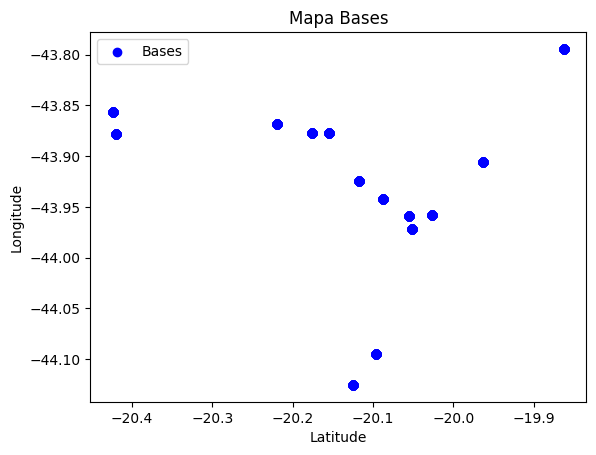

In [9]:
# Criando o mapa de bases
base_map = {i: (lat, long) for i, lat, long in zip(data.index, data['Latitude_Base'], data['Longitude_Base'])}
# Plotando as bases
plot_location(base_map, label='Bases', alpha=1, title='Mapa Bases', xlabel='Latitude', ylabel='Longitude', legend_loc='best')

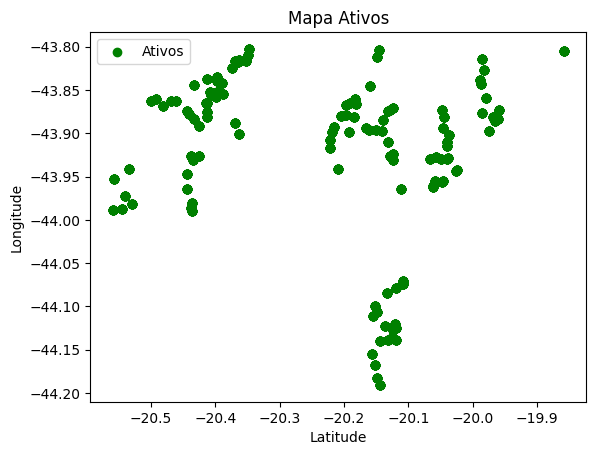

In [10]:
# Criando o mapa de ativos
ativo_map = {i: (lat, long) for i, lat, long in zip(data.index, data['Latitude_Ativo'], data['Longitude_Ativo'])}
# Plotando os ativos
plot_location(ativo_map, label='Ativos', alpha=1, title='Mapa Ativos', xlabel='Latitude', ylabel='Longitude', legend_loc='best', color='green')

In [11]:
# Contar equipes unicas
num_equipes_unicas = 3; # Definida pelo professor
# Contar bases unicas
num_bases_unicas = data[['Latitude_Base', 'Longitude_Base']].drop_duplicates().shape[0]
# Contar ativos únicos
num_ativos_unicos = data[['Latitude_Ativo', 'Longitude_Ativo']].drop_duplicates().shape[0]

# Exibir os resultados
print(f"Número de bases únicas: {num_bases_unicas}")
print(f"Número de ativos únicos: {num_ativos_unicos}")
print(f"Número de equipes únicos: {num_equipes_unicas}")

Número de bases únicas: 14
Número de ativos únicos: 125
Número de equipes únicos: 3


#Codigo

### Inicializar Projeto

In [39]:
def plot_graph(data, label, color=None, title=None, xlabel='Iterações', ylabel='Fitness', legend_loc='best', color_cycle=None):
    """
    Plota o gráfico de um histórico de otimização, com vários parâmetros personalizáveis.

    Parameters:
    - data: Dados a serem plotados (geralmente `historico.fit`).
    - label: Texto para o label da legenda.
    - color: Cor da linha do gráfico (padrão é None, que vai usar uma cor automática).
    - title: Título do gráfico (opcional).
    - xlabel: Rótulo para o eixo x (opcional).
    - ylabel: Rótulo para o eixo y (opcional).
    - legend_loc: Localização da legenda (opcional).
    """

    # Plotando a linha do gráfico
    plt.plot(data, label=label)

    # Configurando o título e rótulos dos eixos
    if title:
        plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Configurando a legenda
    plt.legend(loc=legend_loc)

In [40]:
# Função para processar os históricos, já definida anteriormente
def result_historico(historicos, label_prefix, plot_title, xlabel='Índice de Ativo', ylabel='Valor ou Posição do Ativo'):
    """
    Função para processar os históricos de otimização, calcular as estatísticas e plotar os gráficos.

    Parâmetros:
    historicos (list): Lista de objetos históricos contendo as soluções.
    label_prefix (str): Prefixo para o label do gráfico, identificando o tipo de otimização.
    plot_title (str): Título do gráfico a ser gerado.
    xlabel (str): Rótulo do eixo x do gráfico.
    ylabel (str): Rótulo do eixo y do gráfico.
    """

    # Obtendo os dados da última solução do histórico
    ativo_base = historicos[-1].sol[-1].ativo_base
    equipe_base = historicos[-1].sol[-1].equipe_base
    fitness = historicos[-1].sol[-1].fitness
    fitness_penalizado = historicos[-1].sol[-1].fitness_penalizado  # Incluindo o fitness penalizado

    # Coletando resultados para calcular as estatísticas
    resultados = []
    for historico in historicos:
        resultados.append(historico.best_solution.fitness)
    resultados = np.array(resultados)

    # Calculando as estatísticas
    min_resultado = resultados.min()
    max_resultado = resultados.max()
    std_resultado = resultados.std()

    # Plotando a distribuição dos ativos
    plot_graph(ativo_base, label=f'{label_prefix} - Ativos',
               title=plot_title,
               xlabel=xlabel, ylabel=ylabel,
               legend_loc='best')

    # Imprimindo os valores de fitness para o histórico
    print(f"Fitness - {label_prefix}: {fitness}")
    print(f"Alocação de equipes: {equipe_base}")
    print(f"Fitness Penalizado - {label_prefix}: {fitness_penalizado}")
    print(f"Mínimo: {min_resultado}")
    print(f"Máximo: {max_resultado}")
    print(f"Desvio Padrão: {std_resultado}")

In [20]:
historicos = []
for _ in range(5):
    # Contador do número de soluções candidatas avaliadas
    num_sol_avaliadas = 0

    # Máximo número de soluções candidatas avaliadas
    max_num_sol_avaliadas = 40e3

    # Número de estruturas de vizinhanças definidas
    kmax = 3

    # Faz a leitura dos dados da instância do problema
    prob_def = get_problem_definition()

    # Gera solução inicial
    x = sol_inicial(prob_def, apply_constructive_heuristic=True)

    # Avalia solução inicial
    x = minimiza_distancias(x, prob_def)
    num_sol_avaliadas += 1

    # Armazena dados para plot
    historico = history()
    historico.update(x)

    historico = BasicVNS(
        prob_def=prob_def,
        initial_solution=x,
        objective_function=minimiza_distancias,
        max_iteration=max_num_sol_avaliadas,
        historico=historico
    )
    historicos.append(historico)


### Função de otimização

In [41]:
def optimize(fobj, apply_constructive_heuristic=False, use_random=False, n_runs=5):
    """
    Função genérica para rodar a otimização com diferentes parâmetros de heurística e função objetivo.

    Parameters:
    - fobj: Função de avaliação (ex: minimiza_distancias, equilibrio_ativos, etc.).
    - apply_constructive_heuristic: Flag para aplicar a heurística construtiva (True/False).
    - use_random: Flag para usar a solução aleatória na inicialização (True/False).
    - n_runs: Número de execuções para realizar (default é 5).

    Retorna:
    - historicos: Lista de históricos das otimizações realizadas.
    """
    historicos = []

    for _ in range(n_runs):
        # Contador do número de soluções candidatas avaliadas
        num_sol_avaliadas = 0

        # Máximo número de soluções candidatas avaliadas
        max_num_sol_avaliadas = 40e3

        # Faz a leitura dos dados da instância do problema
        prob_def = get_problem_definition()

        # Gera solução inicial, dependendo dos parâmetros
        x = sol_inicial(prob_def, apply_constructive_heuristic=apply_constructive_heuristic, use_random=use_random)

        # Avalia solução inicial
        x = fobj(x, prob_def)
        num_sol_avaliadas += 1

        # Armazena dados para plot
        historico = history()
        historico.update(x)

        # Executa o VNS (Variable Neighborhood Search)
        historico = BasicVNS(
            prob_def=prob_def,
            initial_solution=x,
            objective_function=fobj,
            max_iteration=max_num_sol_avaliadas,
            historico=historico
        )
        historicos.append(historico)

    return historicos

##Minimização das distâncias (sem heurística construtiva)

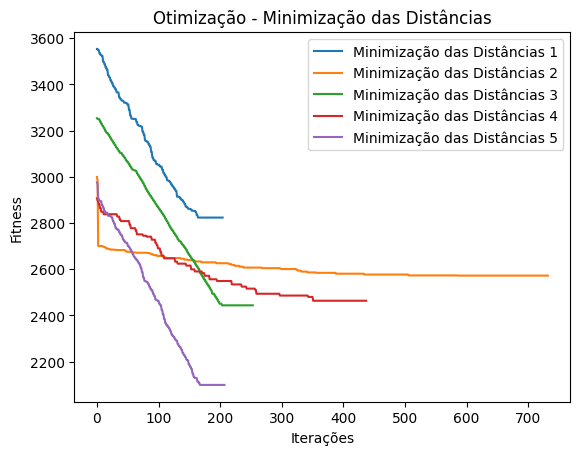

In [42]:
# 1. Minimização das distâncias (sem heurística construtiva)
historicos_min_dist = optimize(minimiza_distancias, apply_constructive_heuristic=False)
for i, historico in enumerate(historicos_min_dist, 1):
    label = f'Minimização das Distâncias {i}'
    plot_graph(historico.fit, label=label, title='Otimização - Minimização das Distâncias')


Fitness - Minimização de Distâncias: 2099.3092536510003
Alocação de equipes: [6 9 4]
Fitness Penalizado - Minimização de Distâncias: 2099.3092536510003
Mínimo: 2099.3092536510003
Máximo: 2823.3426707310005
Desvio Padrão: 233.6336023296811


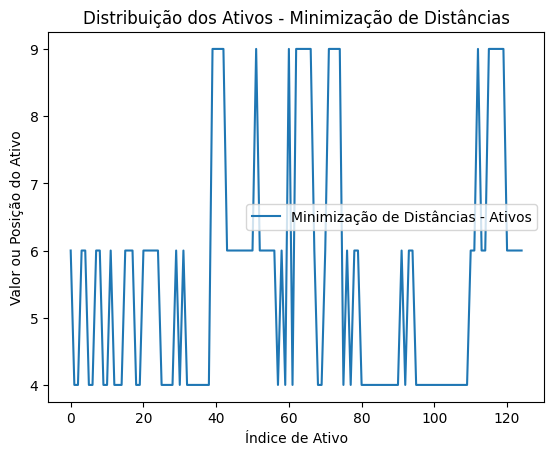

In [ ]:
# 1. Histórico de Minimização de Distâncias
result_historico(historicos_min_dist,
                 label_prefix='Minimização de Distâncias',
                 plot_title='Distribuição dos Ativos - Minimização de Distâncias',
                 xlabel='Índice de Ativo', ylabel='Valor ou Posição do Ativo')

##Equilíbrio dos ativos (sem heurística construtiva, solução aleatória)

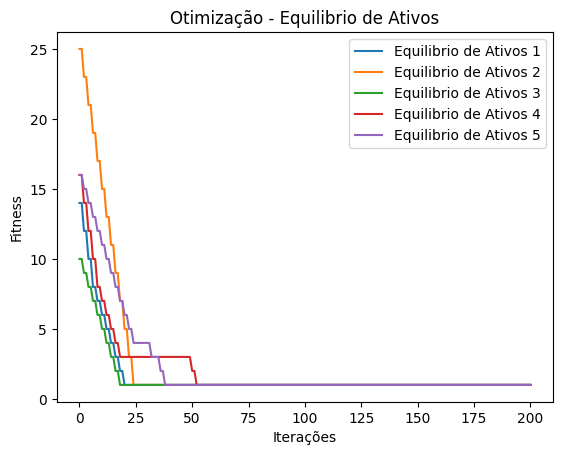

In [24]:
# 2. Equilíbrio dos ativos (sem heurística construtiva, solução aleatória)
historicos_equilibrio = optimize(equilibrio_ativos, apply_constructive_heuristic=False, use_random=True)
for i, historico in enumerate(historicos_equilibrio, 1):
  label = f'Equilibrio de Ativos {i}'
  plot_graph(historico.fit, label=label, title='Otimização - Equilibrio de Ativos')

Fitness - Equilíbrio de Ativos: 1
Alocação de equipes: [0 7 0]
Fitness Penalizado - Equilíbrio de Ativos: 1
Mínimo: 1
Máximo: 1
Desvio Padrão: 0.0


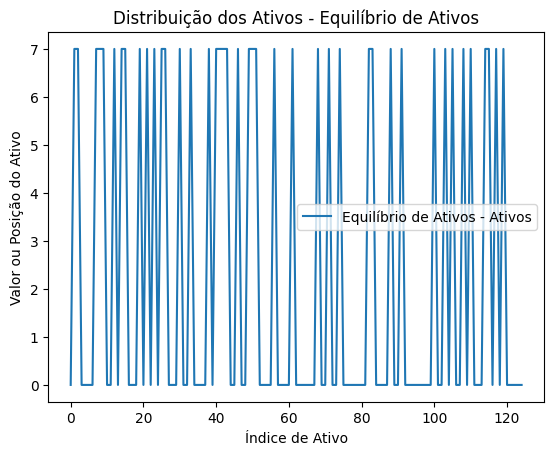

In [25]:
# 2. Histórico de Equilíbrio de Ativos
result_historico(historicos_equilibrio,
                 label_prefix='Equilíbrio de Ativos',
                 plot_title='Distribuição dos Ativos - Equilíbrio de Ativos',
                 xlabel='Índice de Ativo', ylabel='Valor ou Posição do Ativo')

##Minimização das distâncias com heurística construtiva

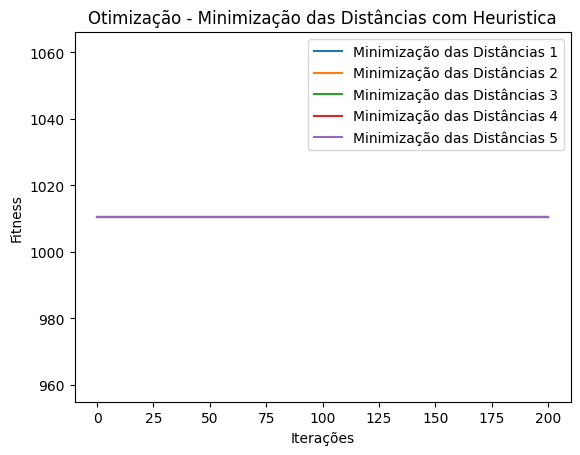

In [26]:
# 3. Minimização das distâncias com heurística construtiva
historicos_min_dist_heuristic = optimize(minimiza_distancias, apply_constructive_heuristic=True)
for i, historico in enumerate(historicos_min_dist_heuristic, 1):
  label = f'Minimização das Distâncias {i}'
  plot_graph(historico.fit, label=label, title='Otimização - Minimização das Distâncias com Heuristica')

Fitness - Minimização de Distâncias com Heurística: 1010.4887291620001
Alocação de equipes: [1, 12, 5]
Fitness Penalizado - Minimização de Distâncias com Heurística: 1010.4887291620001
Mínimo: 1010.4887291620001
Máximo: 1010.4887291620001
Desvio Padrão: 0.0


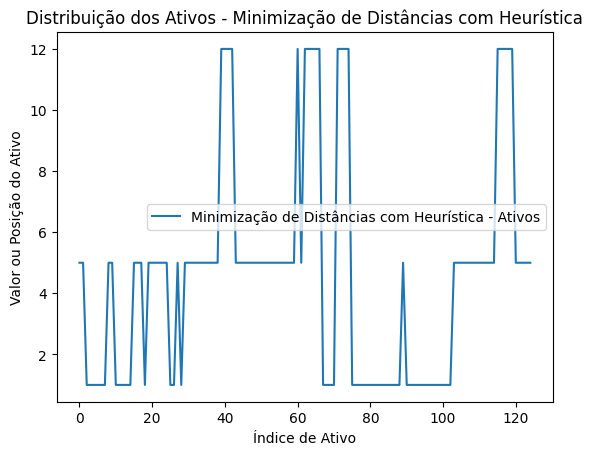

In [27]:
# 3. Histórico de Minimização de Distâncias com Heurística
result_historico(historicos_min_dist_heuristic,
                 label_prefix='Minimização de Distâncias com Heurística',
                 plot_title='Distribuição dos Ativos - Minimização de Distâncias com Heurística',
                 xlabel='Índice de Ativo', ylabel='Valor ou Posição do Ativo')


#Verificando caso com Valores randomicos e Clusters

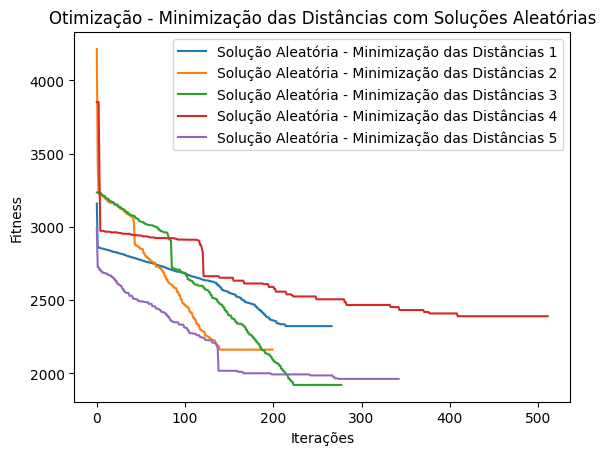

In [28]:
# Minimização das Distâncias com soluções aleatórias
historicos_random_dist = optimize(minimiza_distancias, apply_constructive_heuristic=False, use_random=True, n_runs=5)
for i, historico in enumerate(historicos_random_dist, 1):
    label = f'Solução Aleatória - Minimização das Distâncias {i}'
    plot_graph(historico.fit, label=label, title='Otimização - Minimização das Distâncias com Soluções Aleatórias')

Fitness - Solução Aleatória - Minimização das Distâncias: 1962.4927950940007
Alocação de equipes: [2 6 2]
Fitness Penalizado - Solução Aleatória - Minimização das Distâncias: 1962.4927950940007
Mínimo: 1921.2865404249997
Máximo: 2390.124035373001
Desvio Padrão: 187.12363172268098


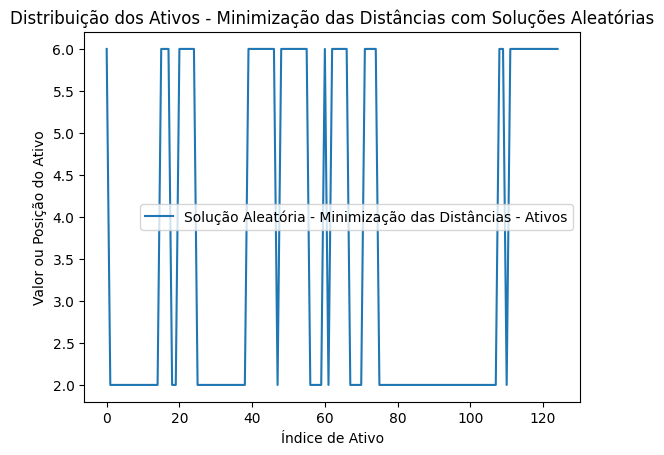

In [29]:
# 4. Histórico de Soluções Aleatórias (Minimização)
result_historico(historicos_random_dist,
                 label_prefix='Solução Aleatória - Minimização das Distâncias',
                 plot_title='Distribuição dos Ativos - Minimização das Distâncias com Soluções Aleatórias',
                 xlabel='Índice de Ativo', ylabel='Valor ou Posição do Ativo')

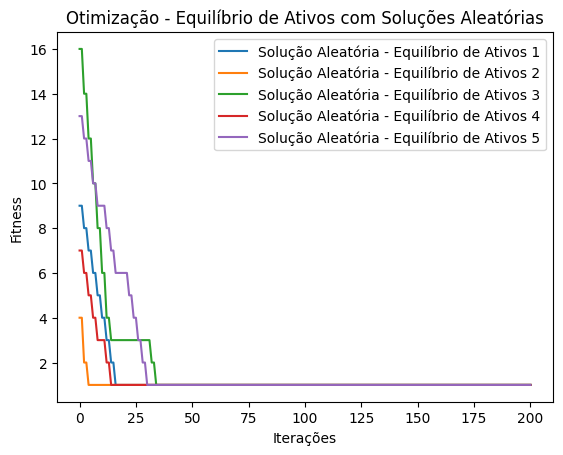

In [30]:
# Equilíbrio de Ativos com soluções aleatórias
historicos_random_equilibrio = optimize(equilibrio_ativos, apply_constructive_heuristic=False, use_random=True, n_runs=5)
for i, historico in enumerate(historicos_random_equilibrio, 1):
    label = f'Solução Aleatória - Equilíbrio de Ativos {i}'
    plot_graph(historico.fit, label=label, title='Otimização - Equilíbrio de Ativos com Soluções Aleatórias')


Fitness - Solução Aleatória - Equilíbrio de Ativos: 1
Alocação de equipes: [13  8 11]
Fitness Penalizado - Solução Aleatória - Equilíbrio de Ativos: 1
Mínimo: 1
Máximo: 1
Desvio Padrão: 0.0


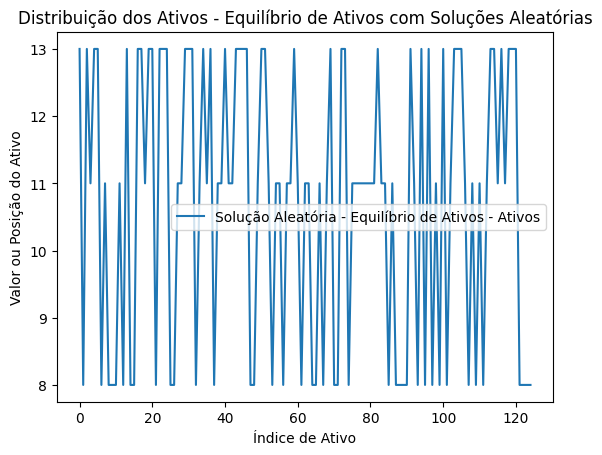

In [31]:
# 5. Histórico de Soluções Aleatórias (Equilíbrio)
result_historico(historicos_random_equilibrio,
                 label_prefix='Solução Aleatória - Equilíbrio de Ativos',
                 plot_title='Distribuição dos Ativos - Equilíbrio de Ativos com Soluções Aleatórias',
                 xlabel='Índice de Ativo', ylabel='Valor ou Posição do Ativo')

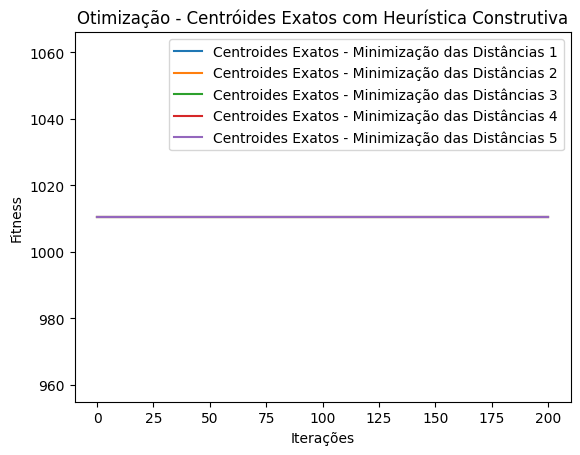

In [32]:
# Centróides Exatos com heurística construtiva
historicos_centroid_exato = optimize(minimiza_distancias, apply_constructive_heuristic=True, use_random=False, n_runs=5)
for i, historico in enumerate(historicos_centroid_exato, 1):
    label = f'Centroides Exatos - Minimização das Distâncias {i}'
    plot_graph(historico.fit, label=label, title='Otimização - Centróides Exatos com Heurística Construtiva')


Fitness - Centróides Exatos - Minimização das Distâncias: 1010.4887291620001
Alocação de equipes: [1, 12, 5]
Fitness Penalizado - Centróides Exatos - Minimização das Distâncias: 1010.4887291620001
Mínimo: 1010.4887291620001
Máximo: 1010.4887291620001
Desvio Padrão: 0.0


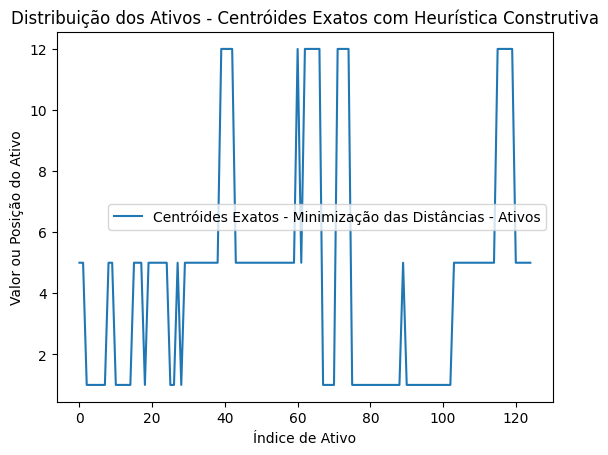

In [33]:
# 6. Histórico de Soluções Centroide
result_historico(historicos_centroid_exato,
                 label_prefix='Centróides Exatos - Minimização das Distâncias',
                 plot_title='Distribuição dos Ativos - Centróides Exatos com Heurística Construtiva',
                 xlabel='Índice de Ativo', ylabel='Valor ou Posição do Ativo')

#Distribuição Gráfica do Problema


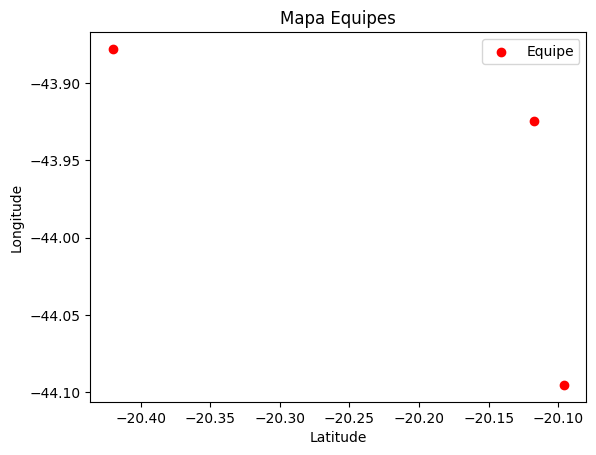

In [35]:
inverse_base_map = {v:k for k, v in prob_def.base_map.items()}
# Criando o mapa de equipe com as localizações das bases
equipe_map = {eq: inverse_base_map[b] for eq, b in enumerate(historicos[0].best_solution.equipe_base)}
# Plotando as localizações da equipe
plot_location(equipe_map, label='Equipe', alpha=1, title='Mapa Equipes', xlabel='Latitude', ylabel='Longitude', legend_loc='best', color='red')

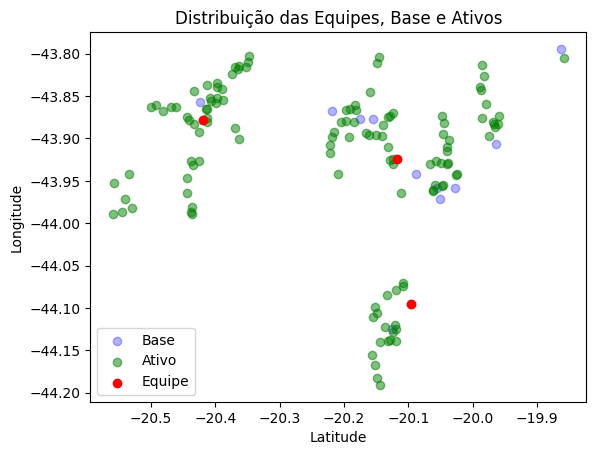

In [36]:
# Reverter os mapas e plotar com informações mais detalhadas
inverse_base_map = {v: k for k, v in prob_def.base_map.items()}
plot_location(inverse_base_map, 'Base', alpha=0.3, xlabel='Latitude', ylabel='Longitude', legend_loc='best', color = 'blue')

inverse_ativo_map = {v: k for k, v in prob_def.ativo_map.items()}
plot_location(inverse_ativo_map, 'Ativo', alpha=0.5, xlabel='Latitude', ylabel='Longitude', legend_loc='best', color = 'green')

# Plotando a equipe com base no mapeamento
equipe_map = {eq: inverse_base_map[b] for eq, b in enumerate(historicos[0].best_solution.equipe_base)}
plot_location(equipe_map, 'Equipe', alpha=1,  title='Distribuição das Equipes, Base e Ativos', xlabel='Latitude', ylabel='Longitude', legend_loc='best', color = 'red')

## Apresentando dados Por Cluster

In [37]:
# Criação do DataFrame com latitudes e longitudes
df = pd.DataFrame(inverse_ativo_map).T
df.columns = ['latitude', 'longitude']  # Nomeando as colunas

# Aplicação do KMeans para 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

# Adicionando a coluna de clusters ao DataFrame
df['cluster'] = kmeans.labels_

# Obtendo os centróides dos clusters
centroids = kmeans.cluster_centers_


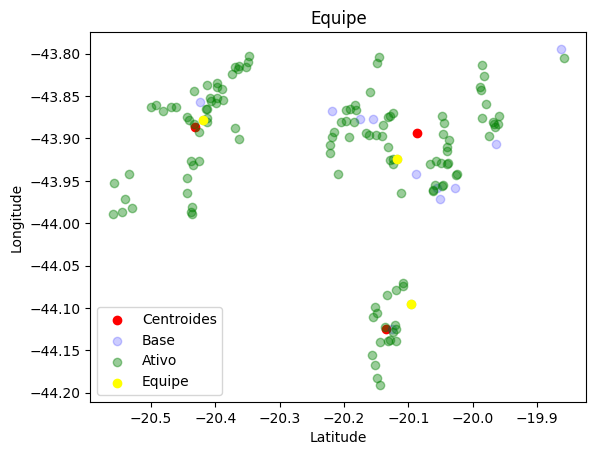

In [38]:
# Plotando os centróides
centroid_map = {c: location for c, location in enumerate(centroids)}
plot_location(centroid_map, 'Centroides', alpha=1, xlabel='Latitude', ylabel='Longitude', legend_loc='best', color = 'red')

# Plotando as bases com alpha de 0.2
inverse_base_map = {v: k for k, v in prob_def.base_map.items()}
plot_location(inverse_base_map, 'Base', alpha=0.2, xlabel='Latitude', ylabel='Longitude', legend_loc='best',color = 'blue')

# Plotando os ativos com alpha de 0.4
inverse_ativo_map = {v: k for k, v in prob_def.ativo_map.items()}
plot_location(inverse_ativo_map, 'Ativo', alpha=0.4, xlabel='Latitude', ylabel='Longitude', legend_loc='best', color = 'green')

# Plotando a equipe
equipe_map = {eq: inverse_base_map[b] for eq, b in enumerate(historicos[0].best_solution.equipe_base)}
plot_location(equipe_map, 'Equipe', alpha=1, title='Equipe',xlabel='Latitude', ylabel='Longitude', legend_loc='best', color = 'yellow')